In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



data=pd.read_csv('C:\\Users\\Amit\\Desktop\\UNSW_NB15_training-set_csc215.csv')

# DataPreprocessing

In [2]:
# Dropping rows with missing values

data=data[data.service !='-']
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0


In [3]:
# segregating dependent training variable
ytrain=data.iloc[:,44]

In [4]:
data= data.drop(columns=['id','attack_cat','label'])

In [5]:
# Performing One Hot Encoding on categorical data
newdata=data
newdata= pd.get_dummies(newdata, columns=['proto', 'service','state'])
newdata.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,0,0,0,1,0,0,0
11,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,...,0,1,0,0,0,0,1,0,0,0
15,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,...,0,0,1,0,0,0,0,1,0,0
17,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,...,0,0,0,0,0,0,1,0,0,0
21,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#Independent matrix of features
xtrain=newdata.iloc[:,:]

In [7]:
xtrain.shape

(81173, 58)

In [8]:
# Datapreprocessing on test data
tdata=pd.read_csv('C:\\Users\\Amit\\Desktop\\UNSW_NB15_test-set_csc215.csv')

In [9]:
tdata=tdata[tdata.service !='-']
tdata.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,36,0.983874,tcp,http,FIN,10,8,816,1172,17.278635,...,1,2,0,0,1,1,3,0,Normal,0
40,41,1.535254,tcp,http,FIN,10,10,826,1266,12.375802,...,1,2,0,0,1,1,3,0,Normal,0
45,46,1.059359,tcp,http,FIN,10,8,830,1134,16.047441,...,1,1,0,0,1,3,1,0,Normal,0
49,50,0.990548,tcp,http,FIN,10,10,804,1414,19.181301,...,1,2,0,0,1,1,2,0,Normal,0
72,73,1.303518,tcp,http,FIN,12,8,898,1120,14.575939,...,1,1,0,0,1,2,1,0,Normal,0


In [10]:
ytest=tdata.iloc[:,44]

In [11]:
tdata= tdata.drop(columns=['id','attack_cat','label'])

In [12]:
tdata= pd.get_dummies(tdata, columns=['proto', 'service','state'])
tdata.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ
35,0.983874,10,8,816,1172,17.278635,62,252,5976.375000,8342.531250,...,0,0,0,0,0,0,0,1,0,0
40,1.535254,10,10,826,1266,12.375802,62,252,3876.882812,5940.385254,...,0,0,0,0,0,0,0,1,0,0
45,1.059359,10,8,830,1134,16.047441,62,252,5641.147461,7498.874512,...,0,0,0,0,0,0,0,1,0,0
49,0.990548,10,10,804,1414,19.181301,62,252,5847.268066,10281.177730,...,0,0,0,0,0,0,0,1,0,0
72,1.303518,12,8,898,1120,14.575939,62,252,5057.083984,6014.492676,...,0,0,0,0,0,0,0,1,0,0


In [13]:
xtest=tdata.iloc[:,:]

In [14]:
xtest.shape

(35179, 58)

In [15]:
ytest.shape

(35179,)

# Using Dimensionality Reduction to select best features using Lasso Regression

In [18]:
%matplotlib inline    
from IPython.display import display   

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print("Intercept: {}".format(intercept))
    r['coef'].plot(figsize=(10,10),kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

Final score (RMSE): 0.30713824371524434


C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483.9100948414464, tolerance: 1.4809324282704512
  positive)


,coef,positive
swin,-9.706404e-04,False
dinpkt,-3.520537e-05,False
dwin,-1.060894e-06,False
sjit,-8.922151e-07,False
dbytes,-3.323560e-07,False
response_body_len,-4.535372e-08,False
sbytes,-3.088103e-08,False
rate,-2.657041e-08,False
dload,-2.084912e-08,False
stcpb,-5.006883e-12,False


Intercept: 0.018910188404361317


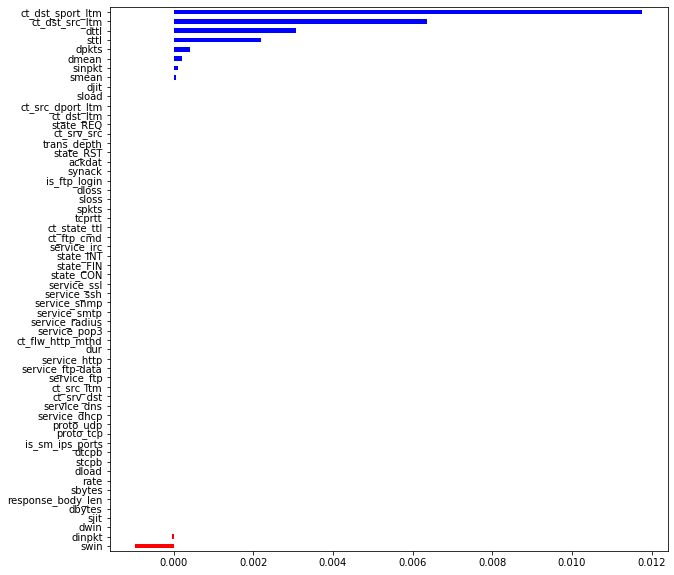

In [19]:
import numpy as np
from sklearn import metrics
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(alpha=0.1)

# Fit/train LASSO
regressor.fit(xtrain,ytrain)
# Predict
pred = regressor.predict(xtest)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,ytest))
print("Final score (RMSE): {}".format(score))

names = list(newdata.columns.values)

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

In [20]:
newdata = newdata[['ct_dst_sport_ltm','ct_dst_src_ltm','dttl','sttl','dpkts','dmean','sinpkt','swin','dinpkt','smean']]

In [21]:
newdata.head()

,ct_dst_sport_ltm,ct_dst_src_ltm,dttl,sttl,dpkts,dmean,sinpkt,swin,dinpkt,smean
3,1,3,252,62,12,64,152.876547,255,90.235726,52
11,1,2,252,62,28,79,34.312868,255,75.092445,909
15,1,4,0,254,0,0,0.002000,0,0.000000,69
17,1,2,252,62,8,137,43.728444,255,47.669145,86
21,1,1,252,254,6,45,35.218111,255,56.579801,100


# Normalizing numeric data

In [22]:
nor_xtrain = StandardScaler()
x_train = nor_xtrain.fit_transform(newdata.iloc[:,:].values)

In [23]:
x_train

array([[-0.89028999, -0.79089334,  1.55459667, ...,  1.18574086,
         0.190109  , -0.35894958],
       [-0.89028999, -0.86525967,  1.55459667, ...,  1.18574086,
         0.13149318,  3.68242111],
       [-0.89028999, -0.71652701, -0.71758686, ..., -0.84335459,
        -0.1591707 , -0.27878237],
       ...,
       [-0.60835901, -0.04723008, -0.71758686, ..., -0.84335459,
        -0.1591707 , -0.33537099],
       [ 0.94226138,  1.21699746, -0.71758686, ..., -0.84335459,
        -0.1591707 , -0.33537099],
       [ 1.22419236,  1.21699746, -0.71758686, ..., -0.84335459,
        -0.1591707 , -0.33537099]])

In [24]:
tdata = tdata[['ct_dst_sport_ltm','ct_dst_src_ltm','dttl','sttl','dpkts','dmean','sinpkt','swin','dinpkt','smean']]

In [25]:
nor_xtest = StandardScaler()
x_test = nor_xtest.fit_transform(tdata.iloc[:,:].values)

# 1. LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
lclassifier = LogisticRegression(random_state = 0)
lclassifier.fit(x_train,ytrain)

C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
ypred = lclassifier.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, ypred)
cm

array([[ 6793,  2832],
       [   28, 25526]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, ypred))

Accuracy:  0.9187014980528156


In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.85      0.89     35179
weighted avg       0.93      0.92      0.91     35179



In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

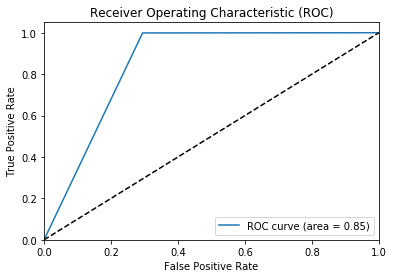

In [32]:
plot_roc(ypred,ytest)

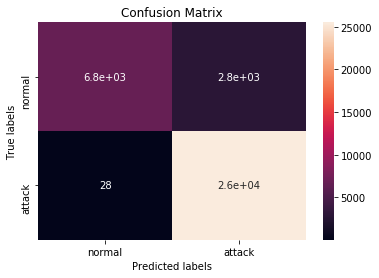

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);

# 2. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski', p=2)
kclassifier.fit(x_train,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
ypred = kclassifier.predict(x_test)

In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, ypred)
cm

array([[ 7857,  1768],
       [  744, 24810]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, ypred))

Accuracy:  0.9285937633247108


In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      9625
           1       0.93      0.97      0.95     25554

    accuracy                           0.93     35179
   macro avg       0.92      0.89      0.91     35179
weighted avg       0.93      0.93      0.93     35179



In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

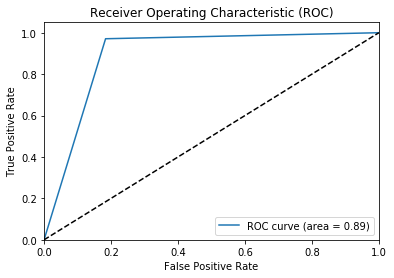

In [40]:
plot_roc(ypred,ytest)

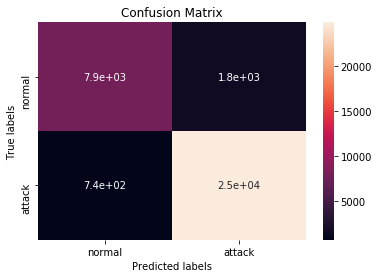

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);

# 3. Support Vector Machine

In [42]:
from sklearn.svm import SVC
sclassifier = SVC(kernel='rbf', random_state=0, gamma=1, C=1000)

In [43]:
sclassifier.fit(x_train,ytrain)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
ypred = sclassifier.predict(x_test)

In [45]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, ypred)
cm

array([[ 7624,  2001],
       [  641, 24913]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, ypred))

Accuracy:  0.924898376872566


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      9625
           1       0.93      0.97      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.92      0.88      0.90     35179
weighted avg       0.92      0.92      0.92     35179



In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

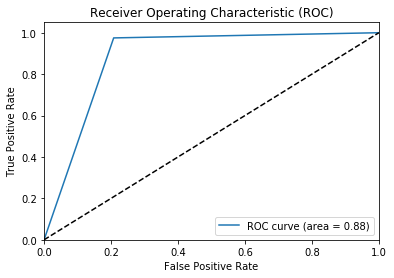

In [50]:
plot_roc(ypred,ytest)

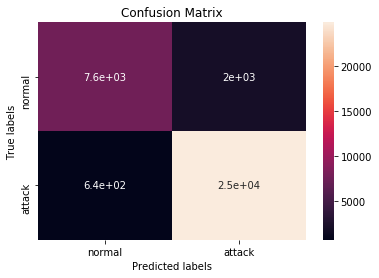

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);

# 4. Fully Connected Neural Networks using Tensorflow

In [52]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [53]:
model = Sequential()
#All 4 neural network models have 4 layers and 21 neurons
#activations using Relu, and sigmoid and optimizer is Adam

model.add(Dense(5, input_dim = 10,activation='relu')) #hidden 1
model.add(Dense(5, activation='relu'))#hidden 2
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C:\\Users\\Amit\\Desktop\\UNSW_NB15_training-set_csc215.csv", verbose=0, save_best_only=True)

W0925 13:02:38.241395 14076 deprecation.py:506] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0925 13:02:38.453483 14076 deprecation.py:323] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [55]:
import os
model.fit(x_train, ytrain,validation_data=(x_test,ytest),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

Train on 81173 samples, validate on 35179 samples
Epoch 1/1000
81173/81173 - 3s - loss: 0.0564 - acc: 0.9785 - val_loss: 0.1300 - val_acc: 0.9199
Epoch 2/1000
81173/81173 - 4s - loss: 0.0561 - acc: 0.9785 - val_loss: 0.1228 - val_acc: 0.9290
Epoch 3/1000
81173/81173 - 3s - loss: 0.0560 - acc: 0.9784 - val_loss: 0.1284 - val_acc: 0.9317
Epoch 4/1000
81173/81173 - 3s - loss: 0.0556 - acc: 0.9786 - val_loss: 0.1207 - val_acc: 0.9393
Epoch 5/1000
81173/81173 - 3s - loss: 0.0557 - acc: 0.9785 - val_loss: 0.1264 - val_acc: 0.9219
Epoch 6/1000
81173/81173 - 4s - loss: 0.0555 - acc: 0.9786 - val_loss: 0.1249 - val_acc: 0.9310
Epoch 7/1000
81173/81173 - 4s - loss: 0.0552 - acc: 0.9788 - val_loss: 0.1302 - val_acc: 0.9250
Epoch 8/1000
81173/81173 - 3s - loss: 0.0550 - acc: 0.9786 - val_loss: 0.1237 - val_acc: 0.9393
Epoch 9/1000
81173/81173 - 3s - loss: 0.0547 - acc: 0.9789 - val_loss: 0.1321 - val_acc: 0.9228
Epoch 00009: early stopping


In [56]:
pred = model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, pred.round())
cm

array([[ 6994,  2631],
       [   86, 25468]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, pred.round()))

Accuracy:  0.9227664231501749


In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      9625
           1       0.91      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.86      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

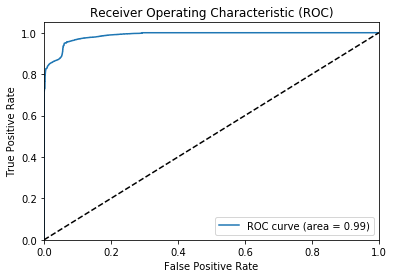

In [61]:
 plot_roc(pred,ytest)

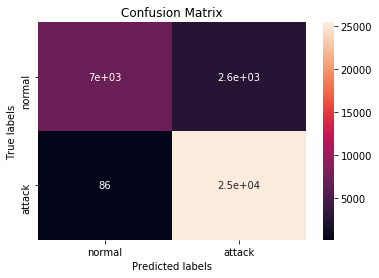

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);

In [63]:
#using tanh and sigmoid and optimizer = sgd
model2 = Sequential()
model2.add(Dense(5, input_dim = 10,activation='tanh'))
model2.add(Dense(5, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C:\\Users\\Amit\\Desktop\\UNSW_NB15_training-set_csc215.csv", verbose=0, save_best_only=True)
model2.fit(x_train, ytrain,validation_data=(x_test,ytest),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

Train on 81173 samples, validate on 35179 samples
Epoch 1/1000
81173/81173 - 4s - loss: 0.1781 - acc: 0.9559 - val_loss: 0.2546 - val_acc: 0.9194
Epoch 2/1000
81173/81173 - 3s - loss: 0.0997 - acc: 0.9768 - val_loss: 0.2390 - val_acc: 0.9194
Epoch 3/1000
81173/81173 - 3s - loss: 0.0939 - acc: 0.9773 - val_loss: 0.2418 - val_acc: 0.9194
Epoch 4/1000
81173/81173 - 3s - loss: 0.0910 - acc: 0.9773 - val_loss: 0.2300 - val_acc: 0.9195
Epoch 5/1000
81173/81173 - 3s - loss: 0.0883 - acc: 0.9773 - val_loss: 0.2265 - val_acc: 0.9195
Epoch 6/1000
81173/81173 - 3s - loss: 0.0858 - acc: 0.9774 - val_loss: 0.2158 - val_acc: 0.9195
Epoch 7/1000
81173/81173 - 3s - loss: 0.0836 - acc: 0.9774 - val_loss: 0.2045 - val_acc: 0.9196
Epoch 8/1000
81173/81173 - 3s - loss: 0.0820 - acc: 0.9774 - val_loss: 0.1981 - val_acc: 0.9196
Epoch 9/1000
81173/81173 - 3s - loss: 0.0808 - acc: 0.9775 - val_loss: 0.1964 - val_acc: 0.9196
Epoch 10/1000
81173/81173 - 3s - loss: 0.0798 - acc: 0.9775 - val_loss: 0.1964 - val_a

In [65]:
pred2 = model2.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, pred2.round())
cm

array([[ 6920,  2705],
       [   14, 25540]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, pred2.round()))

Accuracy:  0.922709571050911


In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred2.round()))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.86      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

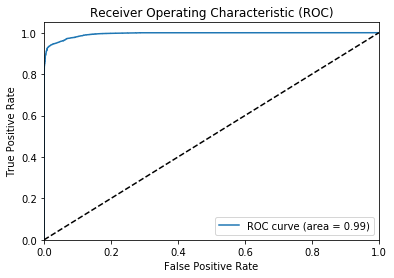

In [70]:
plot_roc(pred2,ytest)

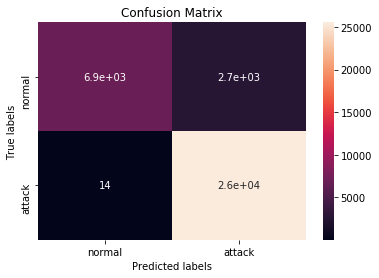

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);

In [72]:
model3 = Sequential()
#Activations used = Relu, and sigmoid and optimizer = sgd

model3.add(Dense(5, input_dim = 10,activation='relu'))
model3.add(Dense(5, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C:\\Users\\Amit\\Desktop\\UNSW_NB15_training-set_csc215.csv", verbose=0, save_best_only=True)
model3.fit(x_train, ytrain,validation_data=(x_test,ytest),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

Train on 81173 samples, validate on 35179 samples
Epoch 1/1000
81173/81173 - 4s - loss: 0.5022 - acc: 0.7776 - val_loss: 0.4275 - val_acc: 0.8284
Epoch 2/1000
81173/81173 - 3s - loss: 0.1607 - acc: 0.9693 - val_loss: 0.2486 - val_acc: 0.9152
Epoch 3/1000
81173/81173 - 3s - loss: 0.0923 - acc: 0.9744 - val_loss: 0.2219 - val_acc: 0.9192
Epoch 4/1000
81173/81173 - 3s - loss: 0.0840 - acc: 0.9763 - val_loss: 0.2034 - val_acc: 0.9200
Epoch 5/1000
81173/81173 - 3s - loss: 0.0801 - acc: 0.9767 - val_loss: 0.2088 - val_acc: 0.9201
Epoch 6/1000
81173/81173 - 3s - loss: 0.0772 - acc: 0.9769 - val_loss: 0.2022 - val_acc: 0.9196
Epoch 7/1000
81173/81173 - 3s - loss: 0.0750 - acc: 0.9770 - val_loss: 0.2077 - val_acc: 0.9199
Epoch 8/1000
81173/81173 - 3s - loss: 0.0736 - acc: 0.9774 - val_loss: 0.1971 - val_acc: 0.9202
Epoch 9/1000
81173/81173 - 3s - loss: 0.0723 - acc: 0.9775 - val_loss: 0.1960 - val_acc: 0.9196
Epoch 10/1000
81173/81173 - 3s - loss: 0.0712 - acc: 0.9775 - val_loss: 0.1886 - val_a

In [73]:
pred3 = model3.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, pred3.round())
cm

array([[ 6808,  2817],
       [    3, 25551]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, pred3.round()))

Accuracy:  0.919838540038091


In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred3.round()))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.85      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

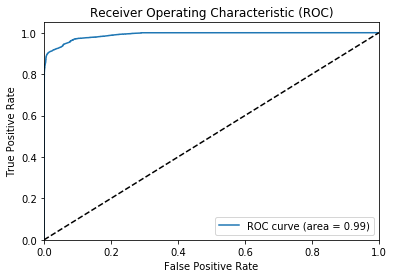

In [78]:
plot_roc(pred3,ytest)

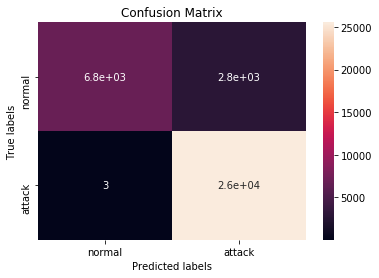

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);

In [80]:
model4 = Sequential()
#Activation used = tanh and sigmoid and optmizer = adam

model4.add(Dense(5, input_dim = 10,activation='tanh'))
model4.add(Dense(5, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C:\\Users\\Amit\\Desktop\\UNSW_NB15_training-set_csc215.csv", verbose=0, save_best_only=True)
model4.fit(x_train, ytrain,validation_data=(x_test,ytest),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

Train on 81173 samples, validate on 35179 samples
Epoch 1/1000
81173/81173 - 4s - loss: 0.1553 - acc: 0.9448 - val_loss: 0.2135 - val_acc: 0.9194
Epoch 2/1000
81173/81173 - 3s - loss: 0.0815 - acc: 0.9772 - val_loss: 0.2321 - val_acc: 0.9194
Epoch 3/1000
81173/81173 - 4s - loss: 0.0769 - acc: 0.9770 - val_loss: 0.1749 - val_acc: 0.9194
Epoch 4/1000
81173/81173 - 3s - loss: 0.0726 - acc: 0.9767 - val_loss: 0.1468 - val_acc: 0.9197
Epoch 5/1000
81173/81173 - 3s - loss: 0.0679 - acc: 0.9769 - val_loss: 0.1319 - val_acc: 0.9235
Epoch 6/1000
81173/81173 - 3s - loss: 0.0636 - acc: 0.9774 - val_loss: 0.1329 - val_acc: 0.9227
Epoch 7/1000
81173/81173 - 3s - loss: 0.0608 - acc: 0.9783 - val_loss: 0.1211 - val_acc: 0.9329
Epoch 8/1000
81173/81173 - 3s - loss: 0.0598 - acc: 0.9788 - val_loss: 0.1246 - val_acc: 0.9260
Epoch 9/1000
81173/81173 - 3s - loss: 0.0588 - acc: 0.9791 - val_loss: 0.1029 - val_acc: 0.9611
Epoch 10/1000
81173/81173 - 3s - loss: 0.0582 - acc: 0.9791 - val_loss: 0.1238 - val_a

In [81]:
pred4 = model4.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, pred4.round())
cm

array([[ 8063,  1562],
       [  178, 25376]], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, pred4.round()))

Accuracy:  0.9505386736405241


In [84]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred4.round()))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      9625
           1       0.94      0.99      0.97     25554

    accuracy                           0.95     35179
   macro avg       0.96      0.92      0.93     35179
weighted avg       0.95      0.95      0.95     35179



In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

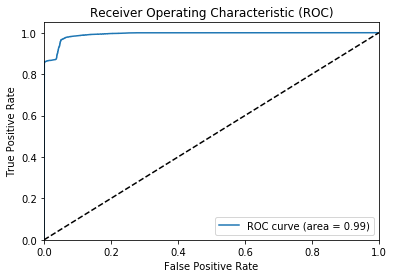

In [86]:
plot_roc(pred4,ytest)

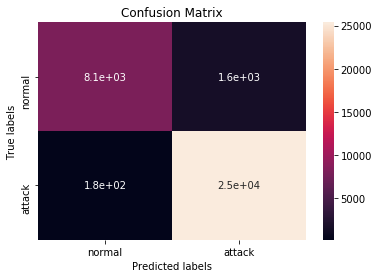

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);